### EXPLORATORY DATA ANALYSIS

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importing the dataset

In [4]:
start_ups = pd.read_csv("C:/Users/user 1/Documents/Fall _ Spring 2022-2023/Course_Work/Fall 2023/Practical ML/Warmup/50_Startups.csv")

start_ups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
start_ups.info()

# From the information provided, none of the variables have missing values.
# Also, all the variables have "float64" datatype except State which is an object or categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
start_ups.describe()

# Describe shows the number of observations, the central tendency measures and the information of 
# a box plot(min,, 25%, 50%, 75%, and max)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [44]:
start_ups["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

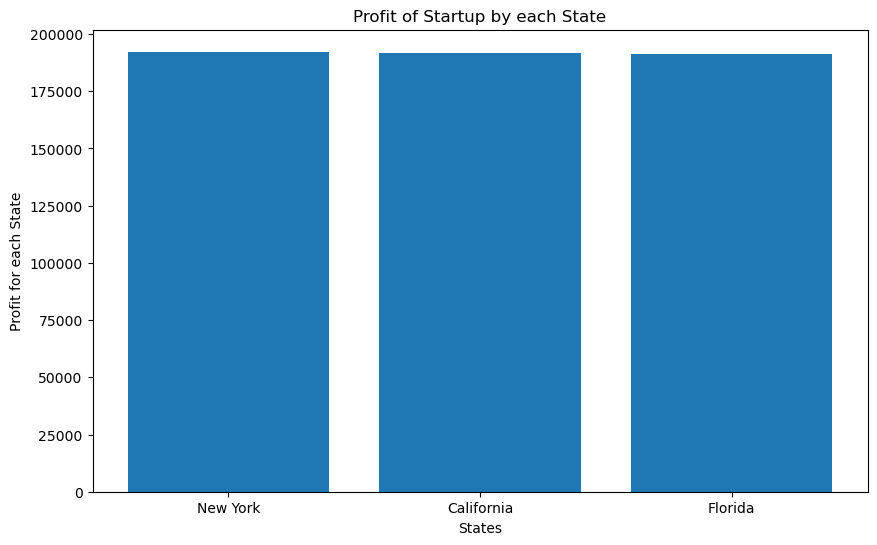

In [12]:
# Plotting the Profit by State

plt.figure(figsize = (10, 6))

plt.bar(start_ups["State"], start_ups["Profit"])

plt.xlabel("States")
plt.ylabel("Profit for each State")

plt.title("Profit of Startup by each State")

plt.show()

# The graph below shows the profit accumulated by each state. From the graph we can see that all
# the states have almost an equal amount of profit.

In [26]:
# Plotting the distributions

def plot_distributions(x):
    plt.figure(figsize=(6, 6))
    sns.histplot(start_ups[x], kde = False, bins = 10)
    plt.ylabel('Frequency')
    plt.title("Histogram or Distribution of Variables")
    plt.show()

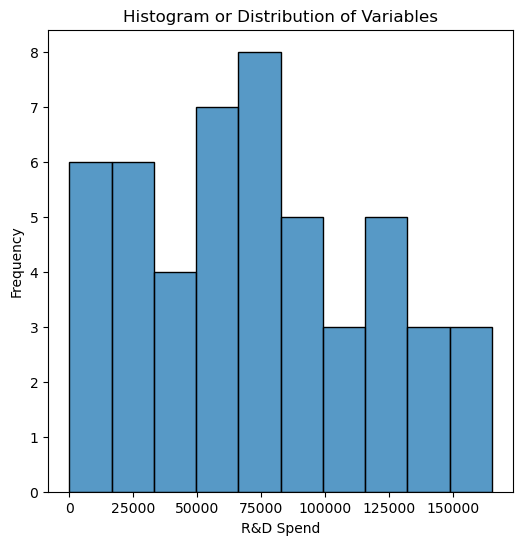

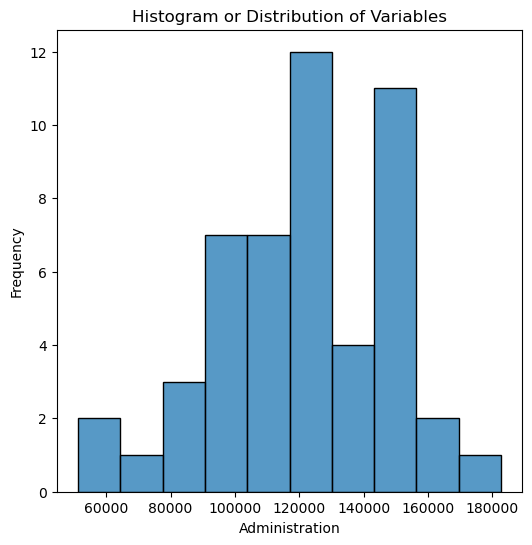

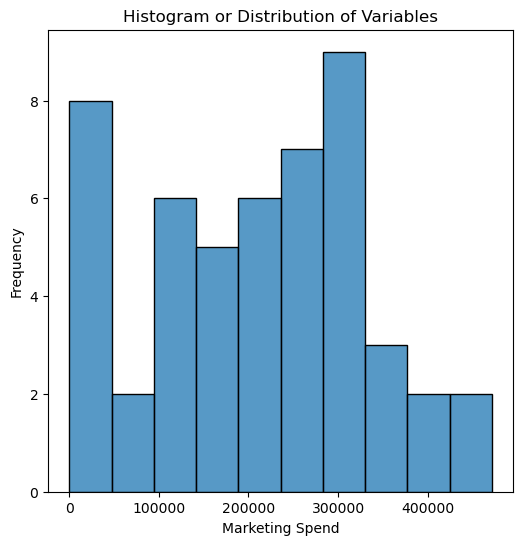

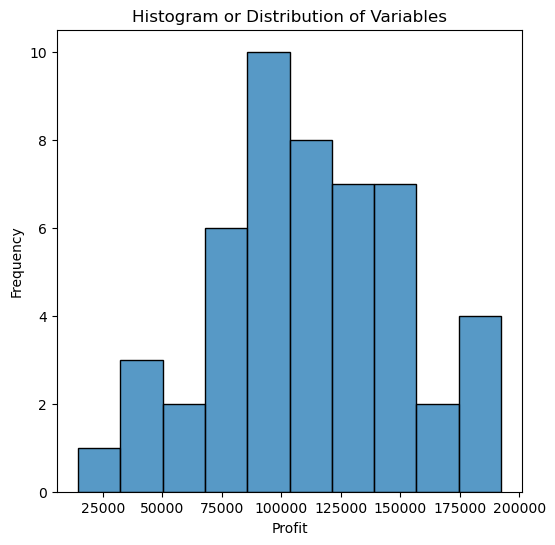

In [27]:
plot_distributions("R&D Spend")
plot_distributions("Administration")
plot_distributions("Marketing Spend")
plot_distributions("Profit")

# From the figures below, we can observe the distribution of the variables below. When we trying 
# to fit machine learning models to this dataset. It is important we know the distributions of 
# these variables especially for paramteric methods like linear regression which assumes the 
# distribution to be normally distributed.
# Knowing such as great information could inform us on how we can improve our machine learning 
# model. For example, we can apply some feature transformations to make our distributions to 
# look like a normal distribution.

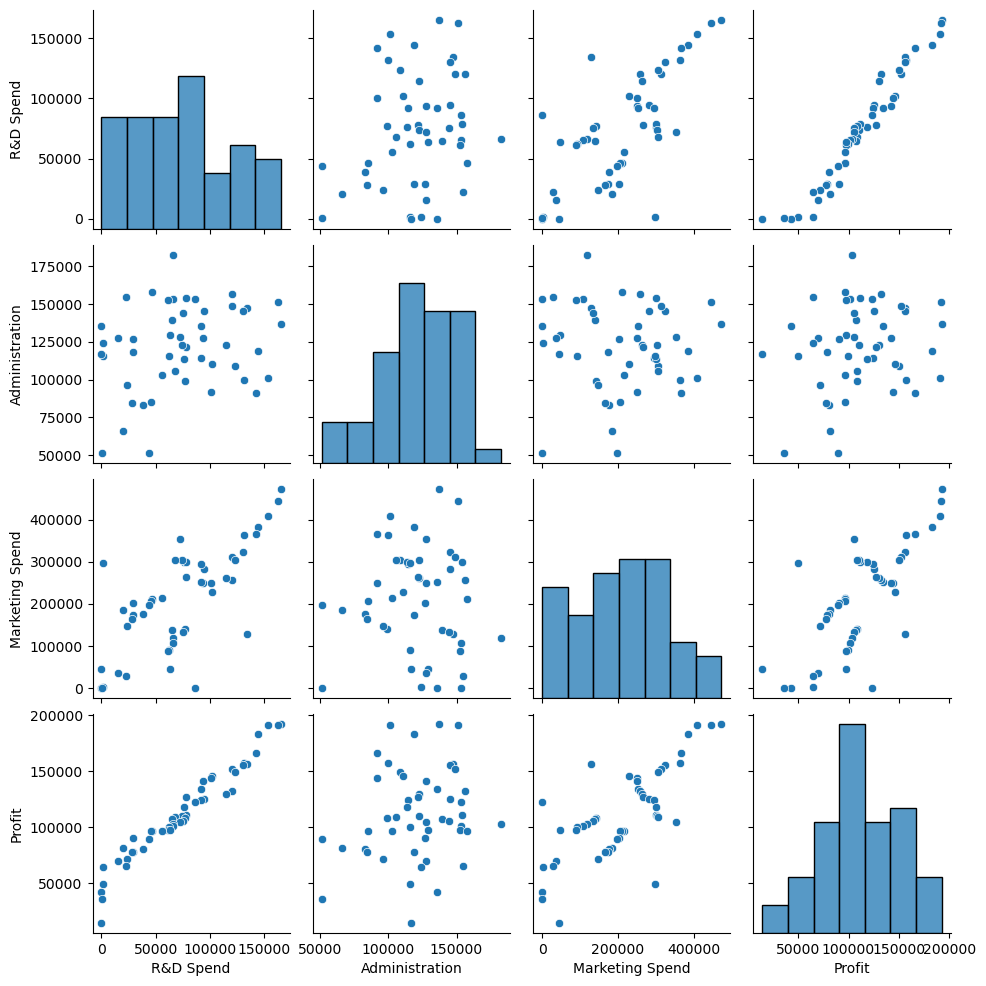

In [38]:
# Plotting the relationship among the independent variables themselves and the dependent 
# variables and independent variables.

startup_pairplot = start_ups.iloc[:,[0, 1, 2, 4]]

sns.pairplot(startup_pairplot)

# The pairplot below shows the relationship between the numeric variables in the dataset.
# From the figure, we can clearly see a strong positive relationship between "R&D Spending" and 
# "Profit". "Marketing" also has a slightly postive relationship with "Profit". "Administration"
# on the other hand shows a weak relationship with "Profit".
# Again, we can also see a relationship between "Marketing" and "R&D Spending". This signifies 
# there may ne some form of multi-collinearity among the two variables.

In [39]:
# Correlation Plot

startup_pairplot.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


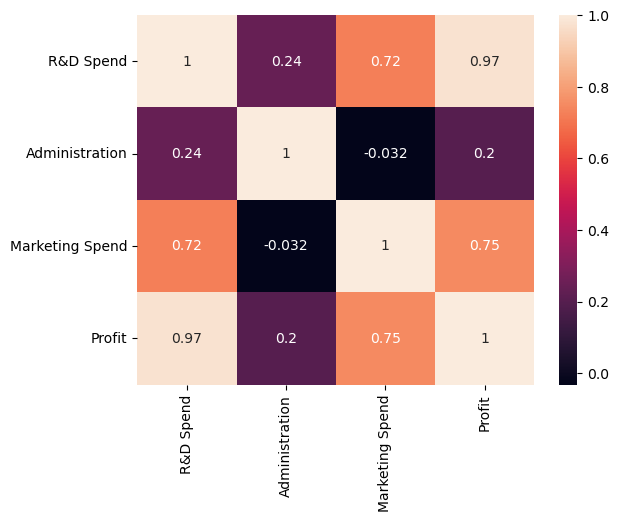

In [43]:
# Plotting th eheatmap of the correlation
sns.heatmap(startup_pairplot.corr(), annot=True)
plt.show()

# As stated above and indicated in the figure below, both "R&D Spend" and "Marketing Spend" have 
# a strong relationship with profit. "R&D Spend" also has a positive correlation with
# "Marketing Spend".